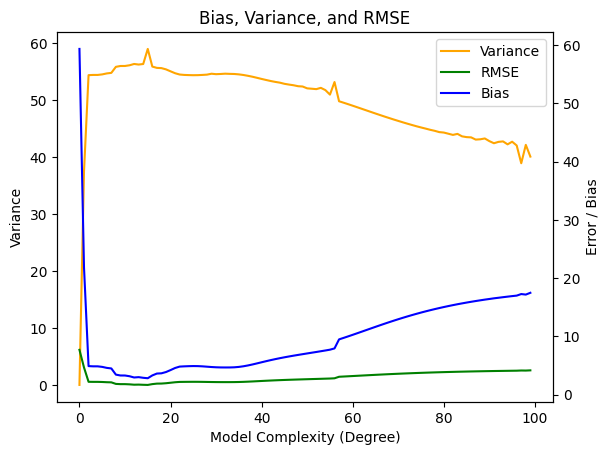

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Generate random data for the independent variable
np.random.seed(0)
X = np.random.rand(30) * 10

# Generate the dependent variable (target) using the equation
y_true = 2 + 3*X - 0.5*X**2 + np.random.randn(30) * 2

degrees = np.arange(0, 100)
errors = []
biases = []
variances = []

for degree in degrees:
    # Transform the independent variable using polynomial features
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(X.reshape(-1, 1))

    # Fit the polynomial regression model
    model = LinearRegression()
    model.fit(X_poly, y_true)

    # Predict the target values
    y_pred = model.predict(X_poly)

    # Calculate bias, variance, and error
    bias = np.mean((y_pred - y_true)**2)
    variance = np.var(y_pred)
    error = np.sqrt(mean_squared_error(y_true, y_pred))  # Calculate RMSE

    biases.append(bias)
    variances.append(variance)
    errors.append(error)

# Create the figure and axis objects
fig, ax1 = plt.subplots()

# Plot the variance on the first y-axis
ax1.plot(degrees, variances, label='Variance', color='orange')
ax1.set_ylabel('Variance')

# Create a second y-axis on the right side
ax2 = ax1.twinx()
ax2.plot(degrees, errors, label='RMSE', color='green')
ax2.plot(degrees, biases, label='Bias', color='blue')

# Set the labels and title
ax2.set_ylabel('Error / Bias')
ax1.set_xlabel('Model Complexity (Degree)')
ax1.set_title('Bias, Variance, and RMSE')

# Display the legend
lines = ax1.get_lines() + ax2.get_lines()
labels = [line.get_label() for line in lines]
ax1.legend(lines, labels, loc='best')

# Display the plot
plt.show()
